In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pysam
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

In [2]:
sex_palette = {'Male': '#5197D0', 'Female': '#FF7593'}
cohort_palette={'ucsf': '#82C61A', 'uq':'#E85F22'}
type_palette={'als':'#ef622b', 'ctrl':'#af1a24'}
blue_orange={'ctrl':'#7da7cd', 'als':'#ef622b'}

In [3]:
ucsf = pd.read_csv("./ucsf/ucsf_combined_redone.tsv", delimiter='\t')
uq = pd.read_csv("./uq/uq_combined.tsv", delimiter='\t')

In [4]:
clinical = pd.read_csv("../als_cfdna_samples/combined_metadata_redone.csv")

In [5]:
#clinical = clinical[clinical['sample_type'] != 'bsctrl']
ucsf_clinical = clinical[clinical['cohort'] == 'ucsf']
ucsf_clinical = ucsf_clinical[ucsf_clinical['sample_type'] != 'bsctrl']

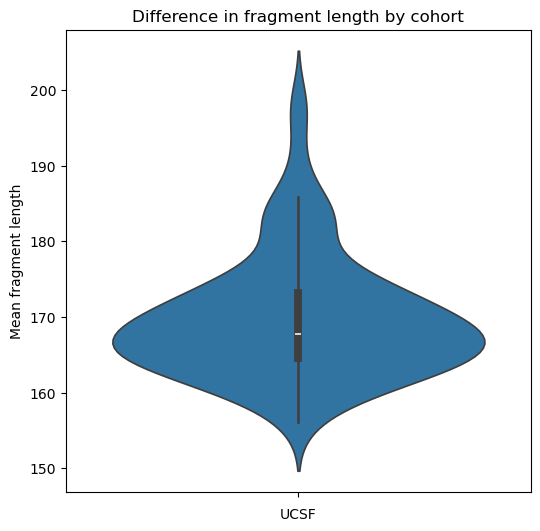

In [6]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=ucsf_clinical, y='mean_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

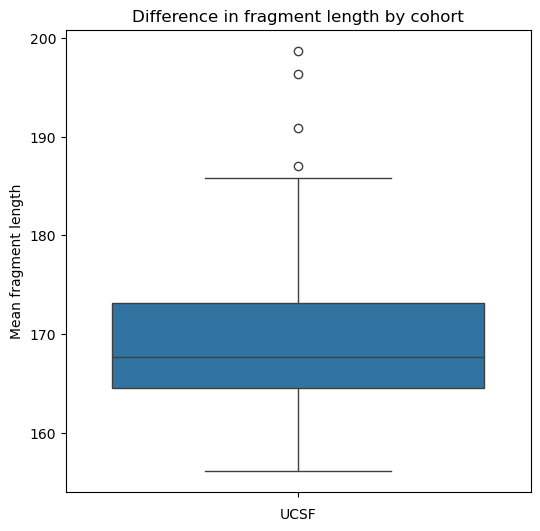

In [7]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=ucsf_clinical, y='mean_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

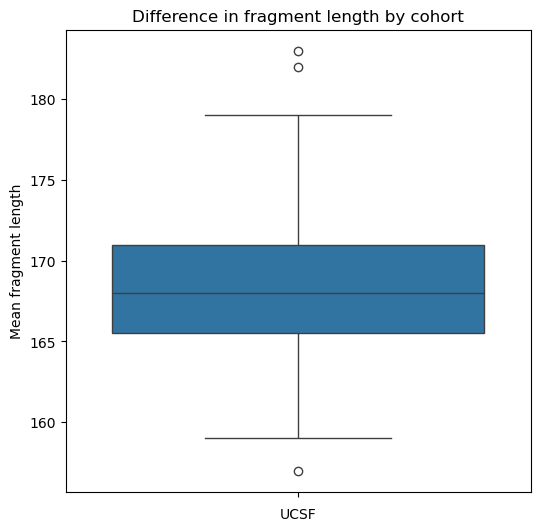

In [8]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=ucsf_clinical, y='median_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

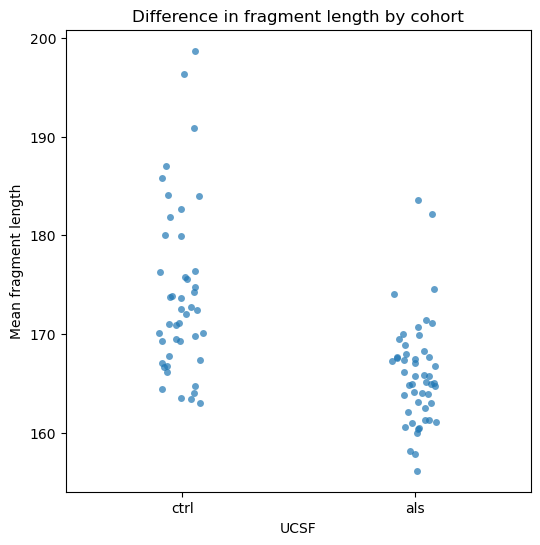

In [9]:
plt.figure(figsize=(6, 6))
sns.stripplot(data=ucsf_clinical, x='sample_type', y='mean_fl', jitter=True, alpha=0.7)
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

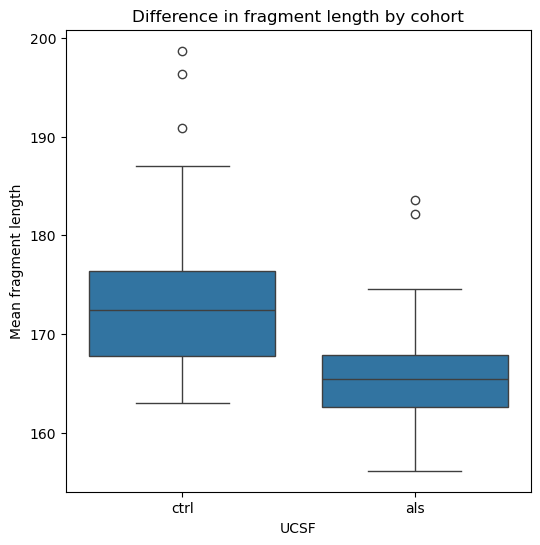

In [10]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=ucsf_clinical, x='sample_type', y='mean_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

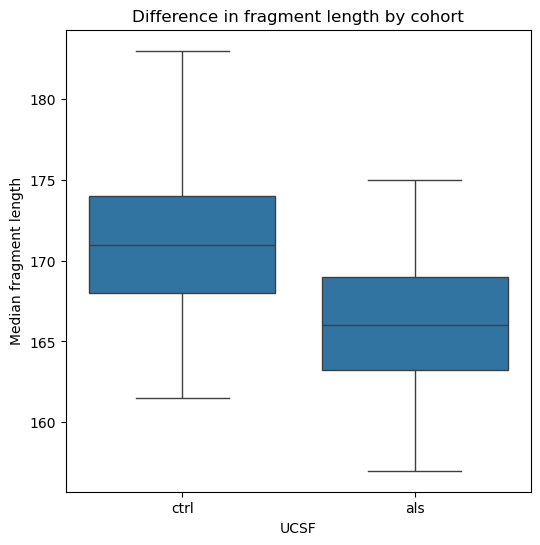

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=ucsf_clinical, x='sample_type', y='median_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Median fragment length')
plt.show()

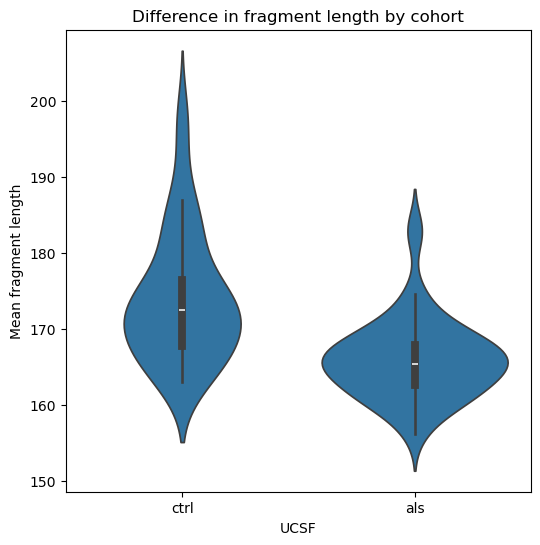

In [12]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=ucsf_clinical, x='sample_type', y='mean_fl')
plt.title('Difference in fragment length by cohort')
plt.xlabel('UCSF')
plt.ylabel('Mean fragment length')
plt.show()

statistical testing

In [13]:
ucsf_clinical["type_binary"] = ucsf_clinical["sample_type"].replace({"ctrl":0, "als":1})
ucsf_clinical["sex_binary"] = ucsf_clinical["sex"].replace({"Male":0, "Female":1})

In [14]:
# Define the predictor and the outcome variable
X = ucsf_clinical[['mean_fl']]  # Predictor(s)
y = ucsf_clinical['type_binary']  # Outcome

# Add a constant to the predictor(s)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Get the model summary
summary = model.summary()
print(summary)

# Extract the p-values
p_values = model.pvalues
print(p_values)

Optimization terminated successfully.
         Current function value: 0.535227
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            type_binary   No. Observations:                   95
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.2263
Time:                        11:18:45   Log-Likelihood:                -50.847
converged:                       True   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 4.937e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9702      8.211      4.137      0.000      17.877      50.063
mean_fl       -0.2002      0.

In [15]:
X = ucsf_clinical[['median_fl']]  # Predictor(s)
y = ucsf_clinical['type_binary']  # Outcome

# Add a constant to the predictor(s)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Get the model summary
summary = model.summary()
print(summary)

# Extract the p-values
p_values = model.pvalues
print(p_values)

Optimization terminated successfully.
         Current function value: 0.535817
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            type_binary   No. Observations:                   95
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.2254
Time:                        11:18:45   Log-Likelihood:                -50.903
converged:                       True   LL-Null:                       -65.717
Covariance Type:            nonrobust   LLR p-value:                 5.230e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5076     11.868      4.340      0.000      28.247      74.768
median_fl     -0.3048      0.

In [16]:
mod = smf.logit(formula='type_binary ~ mean_fl', data=ucsf_clinical).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.535227
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: type_binary      Pseudo R-squared: 0.226     
Date:               2024-09-16 11:18 AIC:              105.6932  
No. Observations:   95               BIC:              110.8010  
Df Model:           1                Log-Likelihood:   -50.847   
Df Residuals:       93               LL-Null:          -65.717   
Converged:          1.0000           LLR p-value:      4.9367e-08
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     33.9702    8.2109   4.1372  0.0000  17.8771  50.0633
mean_fl       -0.2002    0.0487  -4.1099  0.0000  -0.2957  -0.1047
=================================================================

"""

end ucsf section

both cohorts

In [17]:
clinical = clinical[clinical['sample_type'] != 'bsctrl']
clinical["type_binary"] = clinical["sample_type"].replace({"ctrl":0, "als":1})
clinical["sex_binary"] = clinical["sex"].replace({"Male":0, "Female":1})
clinical["cohort_binary"] = clinical["cohort"].replace({"ucsf":0, "uq":1})
clinical['ethnicity_binary'] = clinical['ethnicity'].apply(lambda x: 0 if x == 'White' else 1)

In [18]:
binary = ['sample_num', 'age', 'type_binary', 'sex_binary', 'cohort_binary', 'ethnicity_binary']
binary_df = clinical[binary]

In [19]:
binary_df.set_index('sample_num')

,age,type_binary,sex_binary,cohort_binary,ethnicity_binary
sample_num,,,,,
1,74.0,0,0,0,0
2,57.0,0,1,0,0
3,47.0,0,0,0,0
4,55.0,0,0,0,0
5,80.0,0,0,0,0
...,...,...,...,...,...
188,70.0,0,0,1,0
189,69.0,0,0,1,0
190,65.0,0,1,1,0


In [63]:
#binary_df.to_csv("clinical_binary.csv", index=None)

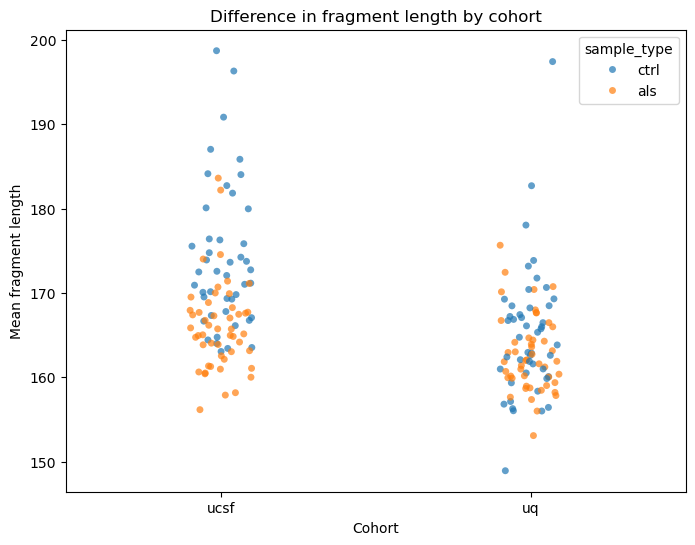

In [20]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=clinical, x='cohort', y='mean_fl', hue='sample_type', jitter=True, alpha=0.7)
plt.title('Difference in fragment length by cohort')
plt.xlabel('Cohort')
plt.ylabel('Mean fragment length')
plt.show()

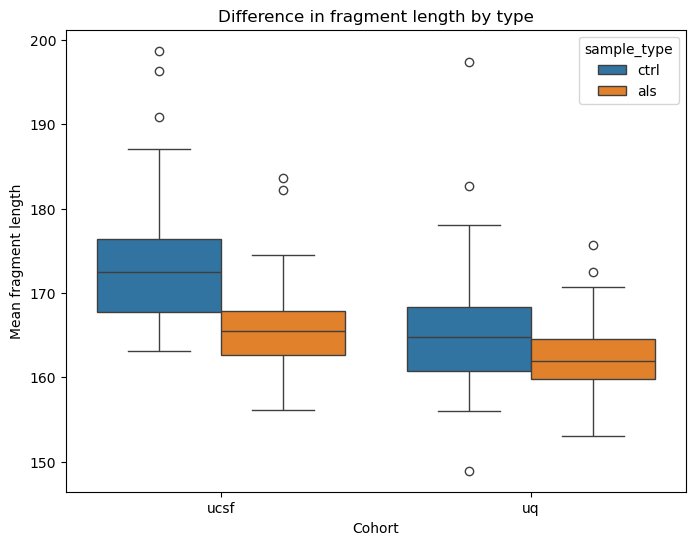

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='mean_fl', hue='sample_type')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Mean fragment length')
plt.show()

add p-values on figure

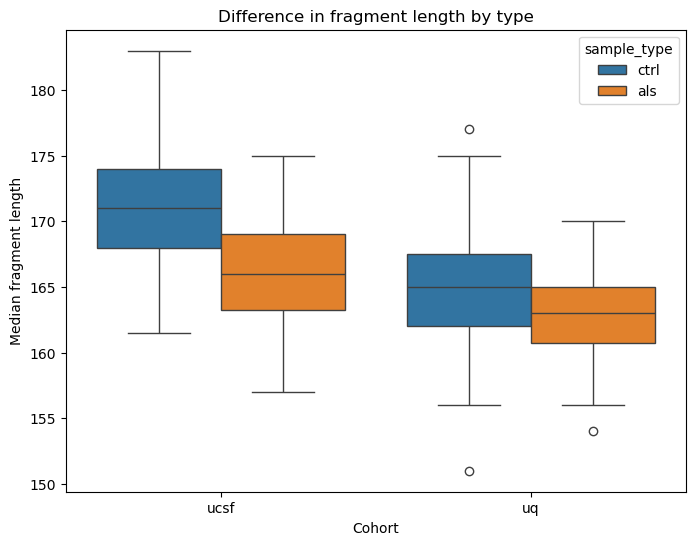

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='median_fl', hue='sample_type')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Median fragment length')
plt.show()

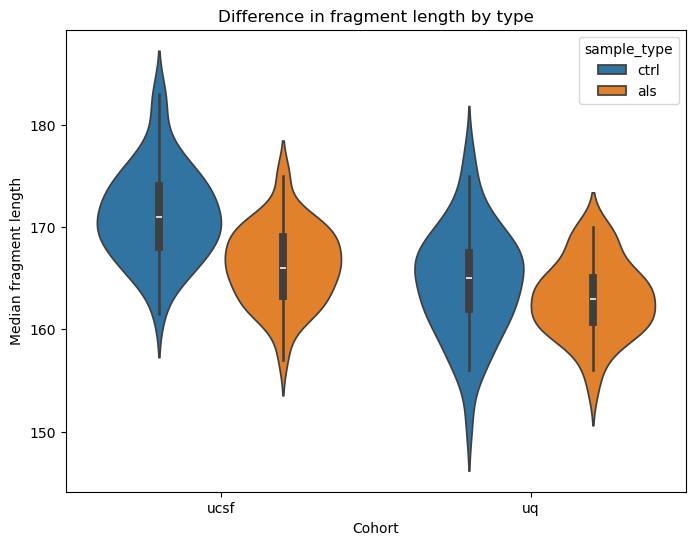

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=clinical, x='cohort', y='median_fl', hue='sample_type')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Median fragment length')
plt.show()

In [24]:
def add_significance(ax, x1, x2, y, p_value, text_offset=1):
    """Add significance bracket to a plot."""
    h = text_offset  # height of the bracket
    col = 'black'  # color of the bracket
    ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s.'
    ax.text((x1 + x2) * 0.5, y + h, text, ha='center', va='bottom', color=col)

/tmp/ipykernel_118750/2952716039.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Cohort 1', 'Cohort 2'])


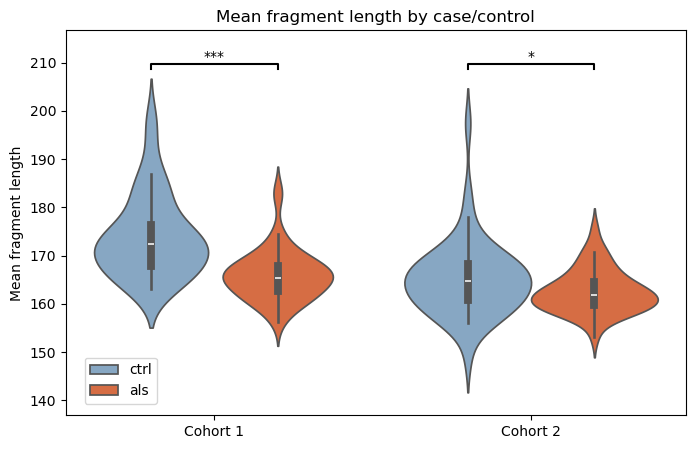

In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=clinical, x='cohort', y='mean_fl', hue='sample_type', palette=blue_orange, alpha=1)
plt.title('Mean fragment length by case/control')
plt.xlabel('')
plt.ylabel('Mean fragment length')

ax = plt.gca()

# Maximum y-value for the plot
y_max = clinical['mean_fl'].max()

# Add brackets
# Adjust x1 and x2 according to the positions of your cohorts and sample types
add_significance(ax, -0.2, 0.2, y_max + 10, 0.0004)  # Cohort1
add_significance(ax, 0.8, 1.2, y_max + 10, 0.049)  # Cohort2

# Show the plot
plt.ylim([clinical['mean_fl'].min() - 12, y_max + 18])
ax.set_xticklabels(['Cohort 1', 'Cohort 2'])
plt.legend(bbox_to_anchor=(0.03, 0.03), loc='lower left', borderaxespad=0.)
#plt.savefig('frag_len_violin.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# plt.figure(figsize=(8, 5))
# sns.violinplot(data=clinical, x='age_bins', y='mean_fl', hue='sample_type', palette=blue_orange, alpha=1)
# plt.title('')
# plt.xlabel('Age')
# plt.ylabel('Mean fragment length')
# plt.legend(bbox_to_anchor=(0.03, 0.03), loc='lower left', borderaxespad=0.)
# plt.ylim([clinical['mean_fl'].min() - 15, y_max + 15])
# #plt.savefig('frag_len_violin_age.png', format='png', dpi=300, bbox_inches='tight')
# plt.show()

In [28]:
# # Create a figure with two subplots (2 rows, 1 column)
# fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# # Plot 1: Mean fragment length by cohort
# sns.violinplot(data=clinical, x='cohort', y='mean_fl', hue='sample_type', palette=blue_orange, alpha=1, ax=axes[0])
# axes[0].set_title('Mean fragment length by case/control')
# axes[0].set_xlabel('')  # Remove x-axis label to avoid redundancy
# axes[0].set_ylabel('Mean fragment length')

# # Maximum y-value for the plot
# y_max = clinical['mean_fl'].max()

# # Add significance brackets for the first plot
# add_significance(axes[0], -0.2, 0.2, y_max + 10, 0.0004)  # Cohort1
# add_significance(axes[0], 0.8, 1.2, y_max + 10, 0.049)  # Cohort2

# # Adjust y-limits and x-tick labels
# axes[0].set_ylim([clinical['mean_fl'].min() - 12, y_max + 18])
# axes[0].set_xticklabels(['Cohort 1', 'Cohort 2'])
# axes[0].get_legend().remove()

# # Plot 2: Mean fragment length by age bins
# sns.violinplot(data=clinical, x='age_bins', y='mean_fl', hue='sample_type', palette=blue_orange, alpha=1, ax=axes[1])
# axes[1].set_title('')  # Title not needed for the second plot
# axes[1].set_xlabel('Age')
# axes[1].set_ylabel('Mean fragment length')

# # Adjust y-limits
# axes[1].set_ylim([clinical['mean_fl'].min() - 15, y_max + 15])
# axes[1].legend(bbox_to_anchor=(0.03, 0.03), loc='lower left', borderaxespad=0.)

# # Adjust layout to make plots closer together
# plt.subplots_adjust(hspace=0.1)

# # Show the combined plot
# #plt.savefig('frag_len_violin.png', format='png', dpi=300, bbox_inches='tight')
# plt.show()


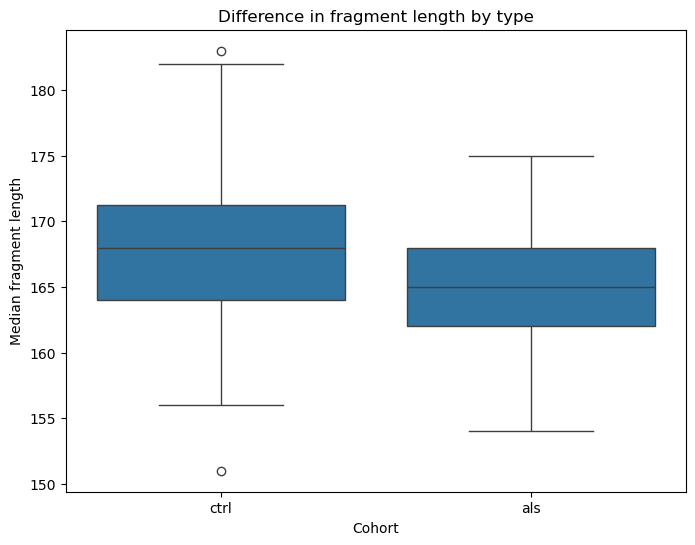

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='sample_type', y='median_fl')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Median fragment length')
plt.show()

In [30]:
mod = smf.logit(formula='type_binary ~ median_fl', data=clinical).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.644495
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: type_binary      Pseudo R-squared: 0.070     
Date:               2024-09-16 11:19 AIC:              248.9081  
No. Observations:   190              BIC:              255.4022  
Df Model:           1                Log-Likelihood:   -122.45   
Df Residuals:       188              LL-Null:          -131.60   
Converged:          1.0000           LLR p-value:      1.8888e-05
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     21.3176    5.3516   3.9834  0.0001  10.8287  31.8065
median_fl     -0.1279    0.0322  -3.9729  0.0001  -0.1909  -0.0648
=================================================================

"""

In [31]:
mod = smf.logit(formula='type_binary ~ mean_fl', data=clinical).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.632915
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: type_binary      Pseudo R-squared: 0.086     
Date:               2024-09-16 11:19 AIC:              244.5078  
No. Observations:   190              BIC:              251.0018  
Df Model:           1                Log-Likelihood:   -120.25   
Df Residuals:       188              LL-Null:          -131.60   
Converged:          1.0000           LLR p-value:      1.8950e-06
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     17.2922    4.1367   4.1802  0.0000   9.1843  25.4000
mean_fl       -0.1035    0.0249  -4.1572  0.0000  -0.1522  -0.0547
=================================================================

"""

In [32]:
mod = smf.logit(formula='type_binary ~ mean_fl + cohort_binary + age + sex_binary + ethnicity_binary', data=clinical).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.586446
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: type_binary      Pseudo R-squared: 0.152     
Date:               2024-09-16 11:19 AIC:              226.6391  
No. Observations:   183              BIC:              245.8960  
Df Model:           5                Log-Likelihood:   -107.32   
Df Residuals:       177              LL-Null:          -126.52   
Converged:          1.0000           LLR p-value:      3.1484e-07
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         20.1966   5.0946  3.9643 0.0001 10.2114 30.1818
mean_fl           -0.1357   0.0302 -4.4961 0.0000 -0.1948 -0.0765
cohort_binary     -0.9596   0.4128 -2.3244 0.0201 -1.7688 -0.1504
age                0.0487   0.0167  2.9216 0.0035  0.0160  0.0813
sex_binary         0.0943   0.3371  0.2797 0.7797 -0.5664  0.7550
ethnicity_binary  -0.2264   0.5388 -0.4201 0.6744 -1.2824  0.8297
=================================================================

"""

plot age

In [33]:
mod = smf.logit(formula='type_binary ~ mean_fl', data=clinical[clinical['cohort'] == 'uq']).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.672751
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: type_binary      Pseudo R-squared: 0.029   
Date:               2024-09-16 11:19 AIC:              131.8226
No. Observations:   95               BIC:              136.9304
Df Model:           1                Log-Likelihood:   -63.911 
Df Residuals:       93               LL-Null:          -65.844 
Converged:          1.0000           LLR p-value:      0.049308
No. Iterations:     5.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   11.2440    6.1399   1.8313  0.0671  -0.7900  23.2779
mean_fl     -0.0685    0.0375  -1.8269  0.0677  -0.1421   0.0050
===============================================================

"""

In [34]:
mod = smf.logit(formula='type_binary ~ mean_fl + age + sex_binary', data=clinical[clinical['cohort'] == 'uq']).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.663278
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: type_binary      Pseudo R-squared: 0.043   
Date:               2024-09-16 11:19 AIC:              132.6963
No. Observations:   94               BIC:              142.8695
Df Model:           3                Log-Likelihood:   -62.348 
Df Residuals:       90               LL-Null:          -65.135 
Converged:          1.0000           LLR p-value:      0.13435 
No. Iterations:     5.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   11.2925    6.3217   1.7863  0.0741  -1.0978  23.6828
mean_fl     -0.0768    0.0392  -1.9585  0.0502  -0.1537   0.0001
age          0.0184    0.0232   0.7938  0.4273  -0.0270   0.0638
sex_binary   0.5266    0.4464   1.1797  0.2381  -0.3483   1.4015
===============================================================

"""

In [35]:
mod = smf.logit(formula='type_binary ~ mean_fl + age + sex_binary', data=clinical[clinical['cohort'] == 'ucsf']).fit()  
mod.summary2()

Optimization terminated successfully.
         Current function value: 0.455476
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: type_binary      Pseudo R-squared: 0.338     
Date:               2024-09-16 11:19 AIC:              89.0747   
No. Observations:   89               BIC:              99.0293   
Df Model:           3                Log-Likelihood:   -40.537   
Df Residuals:       85               LL-Null:          -61.234   
Converged:          1.0000           LLR p-value:      5.3951e-09
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     31.2756    8.9179   3.5070  0.0005  13.7968  48.7544
mean_fl       -0.2082    0.0530  -3.9272  0.0001  -0.3122  -0.1043
age            0.0721    0.0279   2.5836  0.0098   0.0174   0.1268
sex_binary    -0.6187    0.5548  -1.1151  0.2648  -1.7062   0.4688
=================================================================

"""

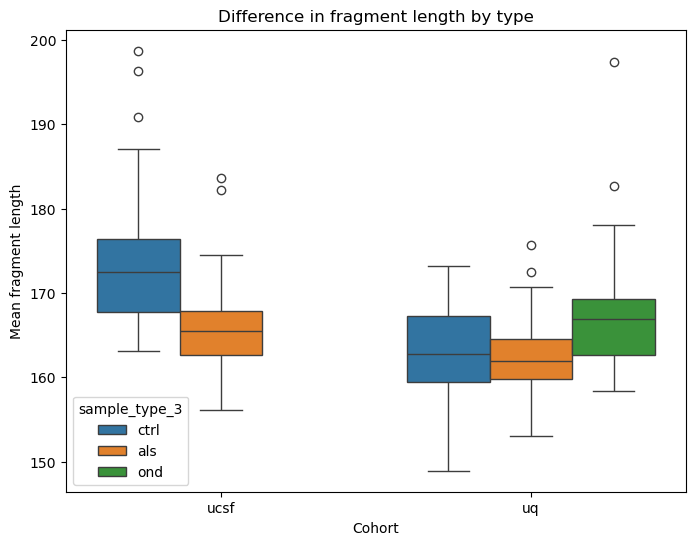

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='mean_fl', hue='sample_type_3')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Mean fragment length')
plt.show()

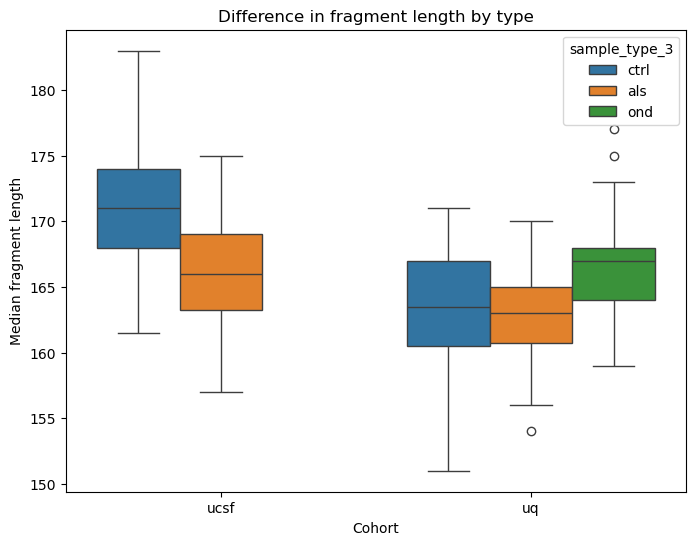

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='cohort', y='median_fl', hue='sample_type_3')
plt.title('Difference in fragment length by type')
plt.xlabel('Cohort')
plt.ylabel('Median fragment length')
plt.show()

In [38]:
def extract_fragment_sizes(bam_path):
    bamfile = pysam.AlignmentFile(bam_path, "rb")
    fragment_sizes = []
    for read in bamfile:
        fragment_sizes.append(abs(read.template_length))
    bamfile.close()
    return fragment_sizes

In [39]:
fragments = extract_fragment_sizes("./ucsf/filtered_redone/32.filtered.bam")

In [40]:
len(fragments)

2048242

In [41]:
df = pd.DataFrame(fragments)

In [42]:
fragments2 = extract_fragment_sizes("./ucsf/filtered_redone/62.filtered.bam")
df2 = pd.DataFrame(fragments2)

In [43]:
len(fragments2)

6851899

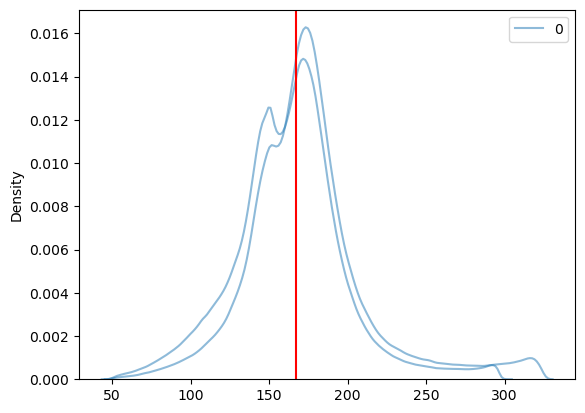

In [44]:
plt.figure()
sns.kdeplot(data=df, label='32', alpha=0.5)
sns.kdeplot(data=df2, label='62', alpha=0.5)
plt.axvline(x=167, color="red")
plt.show()

In [45]:
sample = np.random.choice(fragments, size=10000, replace=False)

In [46]:
sample2 = np.random.choice(fragments2, size=10000, replace=False)

In [47]:
df = pd.DataFrame(sample)
df2 = pd.DataFrame(sample2)

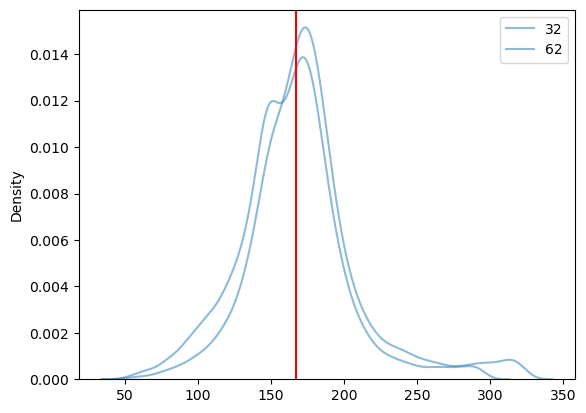

In [48]:
plt.figure()
sns.kdeplot(data=df, label='32', alpha=0.5)
sns.kdeplot(data=df2, label='62', alpha=0.5)
plt.axvline(x=167, color="red")
plt.legend()
plt.show()

In [49]:
df

,0
0,285
1,158
2,202
3,149
4,152
...,...
9995,272
9996,261
9997,170
9998,183


In [50]:
age_bins = pd.cut(clinical['age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
clinical['age_bins'] = age_bins

In [51]:
age_bins2 = pd.cut(clinical['age'], bins=[30, 35, 40, 45, 50, 55, 60, 65, 70, 75], labels=['30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75'])
clinical['age_bins_2'] = age_bins2

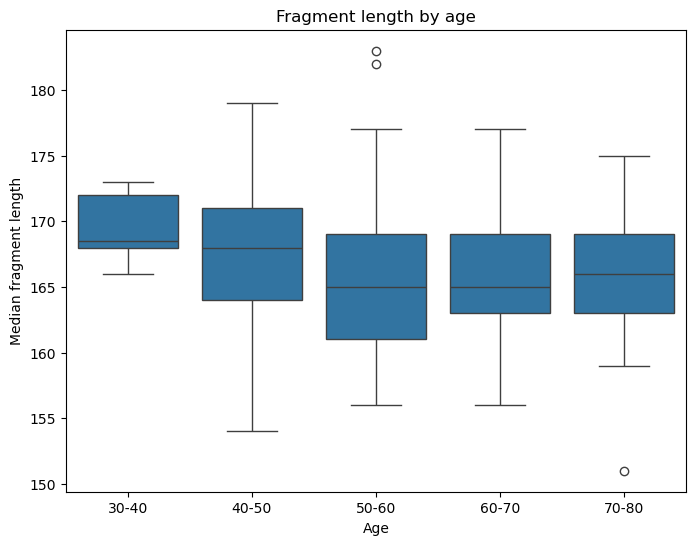

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='age_bins', y='median_fl')
plt.title('Fragment length by age')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

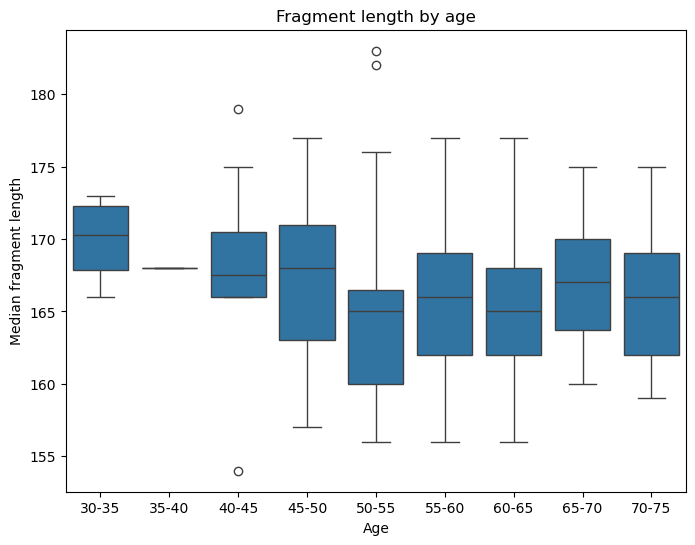

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='age_bins_2', y='median_fl')
plt.title('Fragment length by age')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

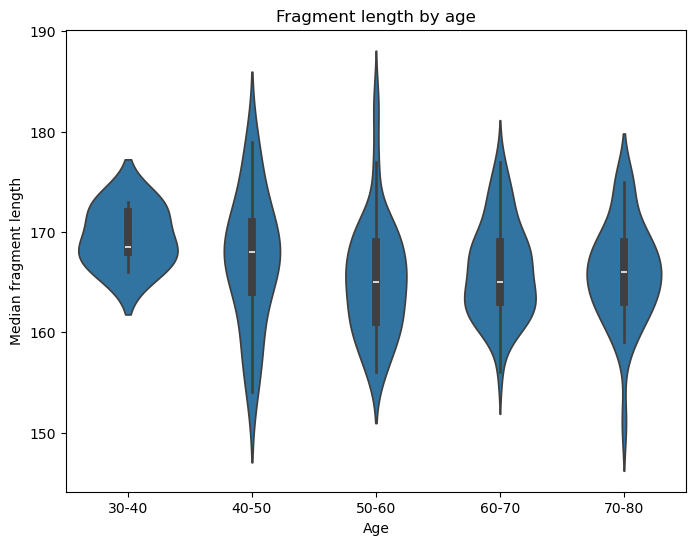

In [54]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=clinical, x='age_bins', y='median_fl')
plt.title('Fragment length by age')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

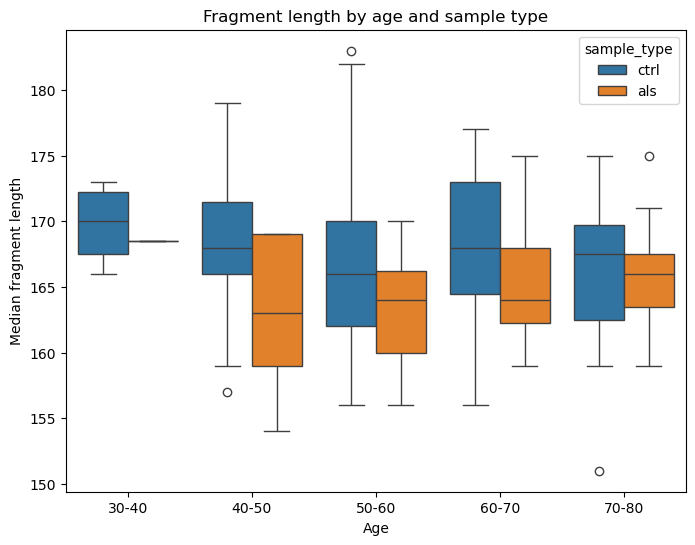

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='age_bins', y='median_fl', hue='sample_type')
plt.title('Fragment length by age and sample type')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

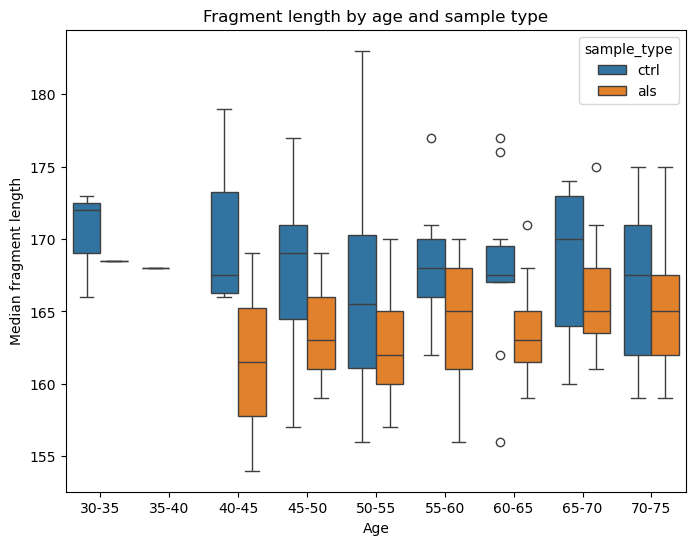

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='age_bins_2', y='median_fl', hue='sample_type')
plt.title('Fragment length by age and sample type')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

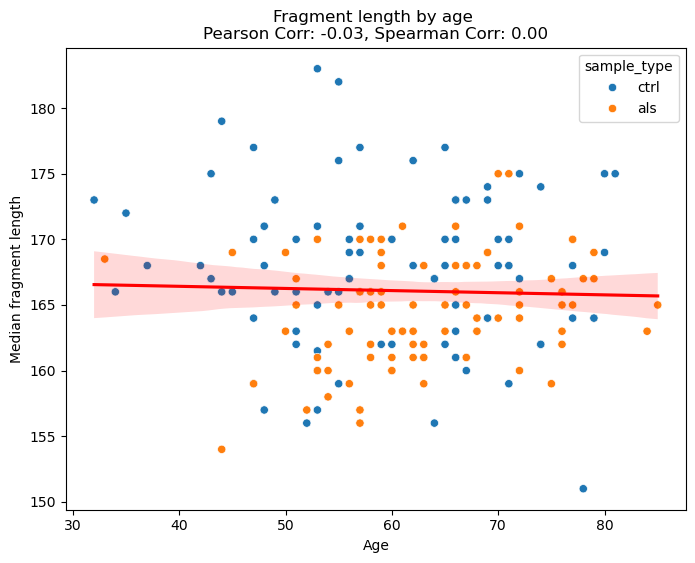

In [57]:
pearson_corr = clinical['age'].corr(clinical['median_fl'])
spearman_corr = clinical['age'].corr(clinical['median_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=clinical, x='age', y='median_fl', hue='sample_type')
sns.regplot(x='age', y='median_fl', data=clinical, scatter=False, color='red')
plt.title(f'Fragment length by age \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

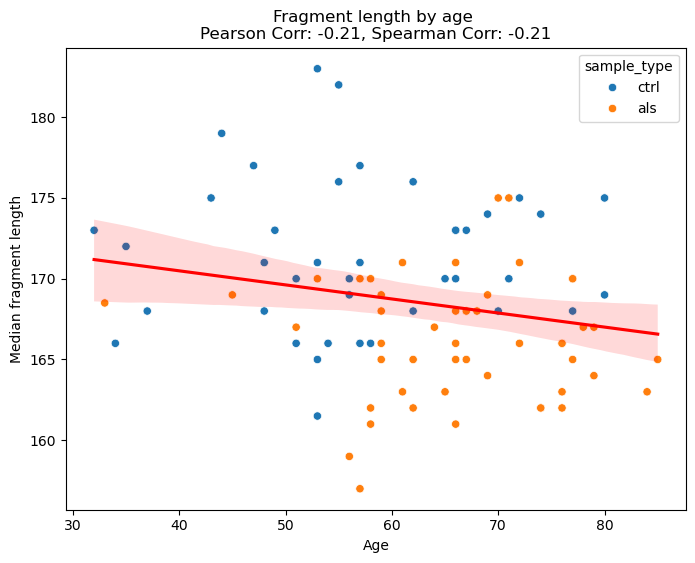

In [58]:
pearson_corr = ucsf_clinical['age'].corr(ucsf_clinical['median_fl'])
spearman_corr = ucsf_clinical['age'].corr(ucsf_clinical['median_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ucsf_clinical, x='age', y='median_fl', hue='sample_type')
sns.regplot(x='age', y='median_fl', data=ucsf_clinical, scatter=False, color='red')
plt.title(f'Fragment length by age \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

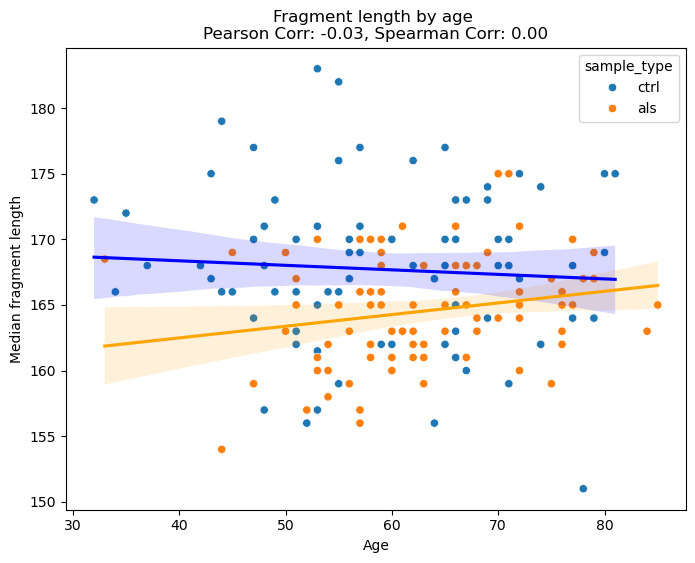

In [59]:
pearson_corr = clinical['age'].corr(clinical['median_fl'])
spearman_corr = clinical['age'].corr(clinical['median_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=clinical, x='age', y='median_fl', hue='sample_type')
sns.regplot(x='age', y='median_fl', data=clinical[clinical['sample_type'] == 'als'], scatter=False, color='orange')
sns.regplot(x='age', y='median_fl', data=clinical[clinical['sample_type'] == 'ctrl'], scatter=False, color='blue')
plt.title(f'Fragment length by age \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

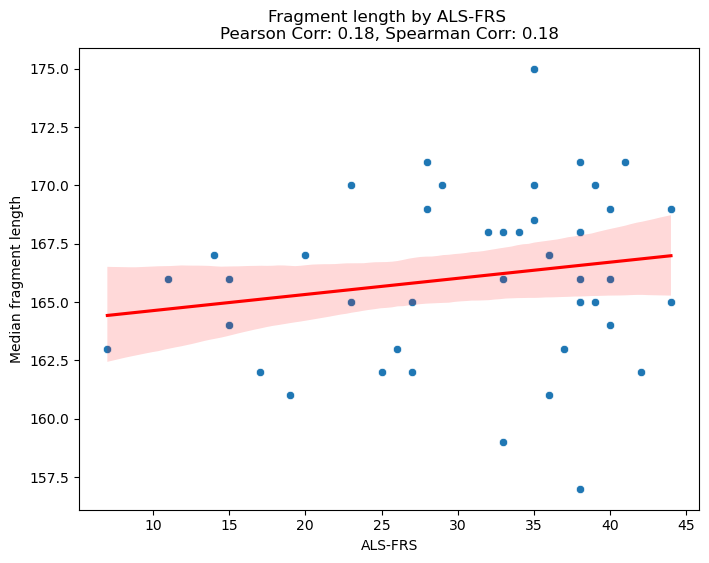

In [60]:
pearson_corr = ucsf_clinical['als_frs'].corr(ucsf_clinical['median_fl'])
spearman_corr = ucsf_clinical['als_frs'].corr(ucsf_clinical['median_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ucsf_clinical, x='als_frs', y='median_fl')
sns.regplot(x='als_frs', y='median_fl', data=ucsf_clinical, scatter=False, color='red')
plt.title(f'Fragment length by ALS-FRS \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('ALS-FRS')
plt.ylabel('Median fragment length')
plt.show()

In [61]:
pearson_corr = uq_clinical['als_frs'].corr(uq_clinical['median_fl'])
spearman_corr = uq_clinical['als_frs'].corr(uq_clinical['median_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=uq_clinical, x='als_frs', y='median_fl')
sns.regplot(x='als_frs', y='median_fl', data=uq_clinical, scatter=False, color='red')
plt.title(f'Fragment length by ALS-FRS \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('ALS-FRS')
plt.ylabel('Median fragment length')
plt.show()

NameError: name 'uq_clinical' is not defined

In [ ]:
pearson_corr = clinical['als_frs'].corr(clinical['mean_fl'])
spearman_corr = clinical['als_frs'].corr(clinical['mean_fl'], method='spearman')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=clinical, x='als_frs', y='mean_fl')
sns.regplot(x='als_frs', y='mean_fl', data=clinical, scatter=False, color='red')
plt.title(f'Fragment length by ALS-FRS \nPearson Corr: {pearson_corr:.2f}, Spearman Corr: {spearman_corr:.2f}')
plt.xlabel('ALS-FRS')
plt.ylabel('Mean fragment length')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=clinical, x='age_bins', y='mean_fl', hue='sample_type', palette=blue_orange)
plt.title('Fragment length by age and sample type')
plt.xlabel('Age')
plt.ylabel('Median fragment length')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clinical, x='age_bins', y='mean_fl', hue='sample_type')
plt.title('Fragment length by age and sample type')
plt.xlabel('Age')
plt.ylabel('Mean fragment length')
plt.show()

In [ ]:
clinical